In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
import clean as clean

In [17]:
# Load and clean the data
df_path = "../data/TBI PUD 10-08-2013.csv"
df = clean.clean_data(df_path)

In [18]:
df.head()

,PatNum,EmplType,Certification,InjuryMech,High_impact_InjSev,Amnesia_verb,LOCSeparate,Seiz,ActNorm,HA_verb,...,Drugs,AgeInMonth,AgeinYears,AgeTwoPlus,Gender,Ethnicity,Race,Observed,EDDisposition,PosIntFinal
0,1,3.0,3,11.0,2.0,0.0,0.0,0.0,1.0,1.0,...,0.0,197,16,2,1.0,2.0,2.0,0.0,1.0,0.0
1,2,5.0,3,8.0,2.0,0.0,0.0,0.0,1.0,0.0,...,0.0,64,5,2,2.0,2.0,1.0,0.0,1.0,0.0
2,3,5.0,3,5.0,2.0,NaN,NaN,NaN,0.0,NaN,...,0.0,170,14,2,1.0,NaN,1.0,0.0,5.0,0.0
3,4,5.0,3,6.0,1.0,91.0,0.0,0.0,1.0,91.0,...,0.0,13,1,1,2.0,2.0,2.0,0.0,1.0,0.0
4,5,3.0,3,12.0,2.0,91.0,0.0,0.0,0.0,91.0,...,0.0,14,1,1,1.0,2.0,2.0,0.0,1.0,0.0


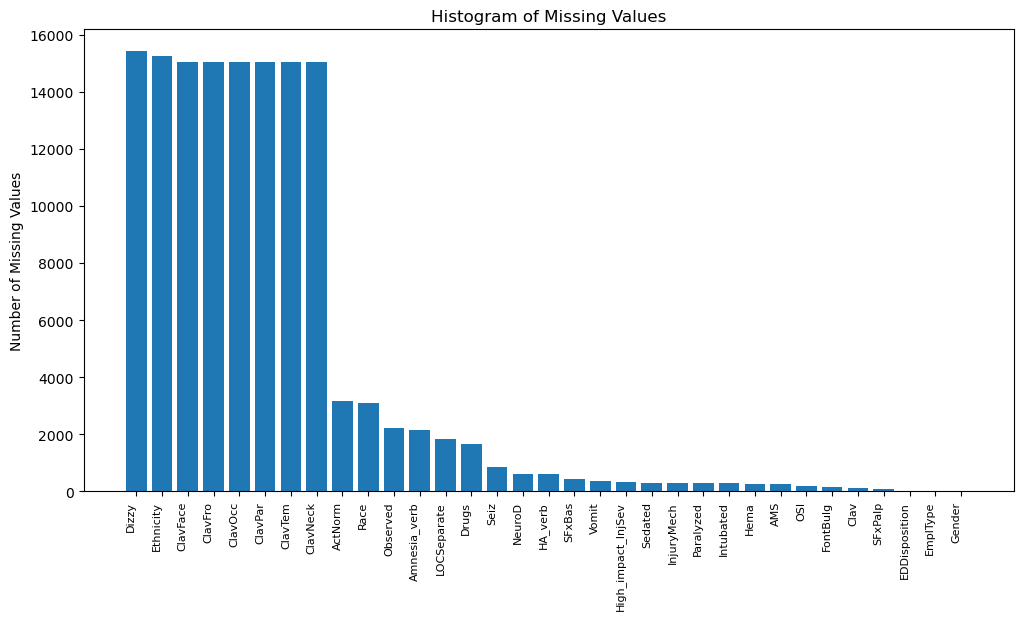

In [38]:
# Plot the histogram of missing values
nan_counts = df.isna().sum()
nan_counts = nan_counts[nan_counts.values > 0]  # Only keep the columns with missing values
nan_counts = nan_counts.sort_values(ascending=False)  # Sort in descending order

plt.figure(figsize=(12, 6))
plt.bar(nan_counts.index, nan_counts.values)
plt.xticks(rotation=90, ha='right', fontsize=8)
plt.ylabel('Number of Missing Values')
plt.title('Histogram of Missing Values')
plt.show()

Class Distribution (Counts):
 PosIntFinal
0.0    41319
1.0      717
Name: count, dtype: int64

Class Distribution (Percentage):
 PosIntFinal
0.0    98.294319
1.0     1.705681
Name: count, dtype: float64


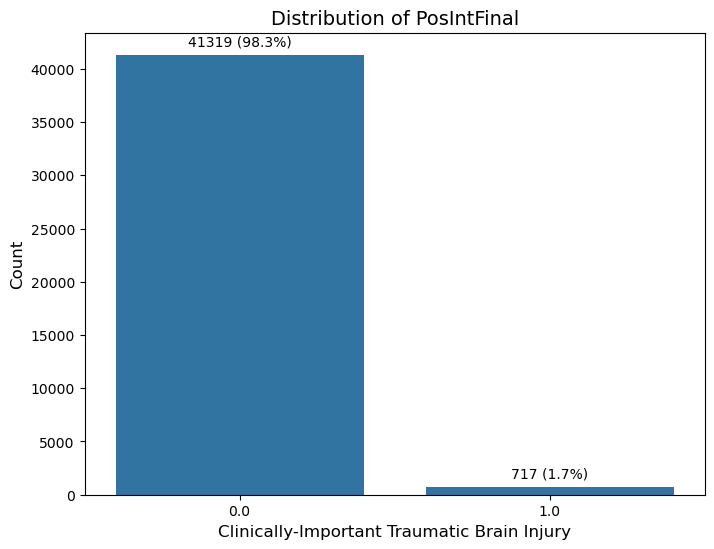

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check the value counts for the binary target
value_counts = df['PosIntFinal'].value_counts()
class_percentage = (value_counts / len(df)) * 100

# Print the class distribution
print("Class Distribution (Counts):\n", value_counts)
print("\nClass Distribution (Percentage):\n", class_percentage)

# Visualize the distribution of the binary target
plt.figure(figsize=(8, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, hue=None)
plt.title('Distribution of PosIntFinal', fontsize=14)
plt.xlabel('Clinically-Important Traumatic Brain Injury', fontsize=12)
plt.ylabel('Count', fontsize=12)
for i, val in enumerate(value_counts.values):
    plt.text(i, val + 0.02 * max(value_counts.values), f'{val} ({class_percentage[i]:.1f}%)', 
             ha='center', fontsize=10)
plt.show()

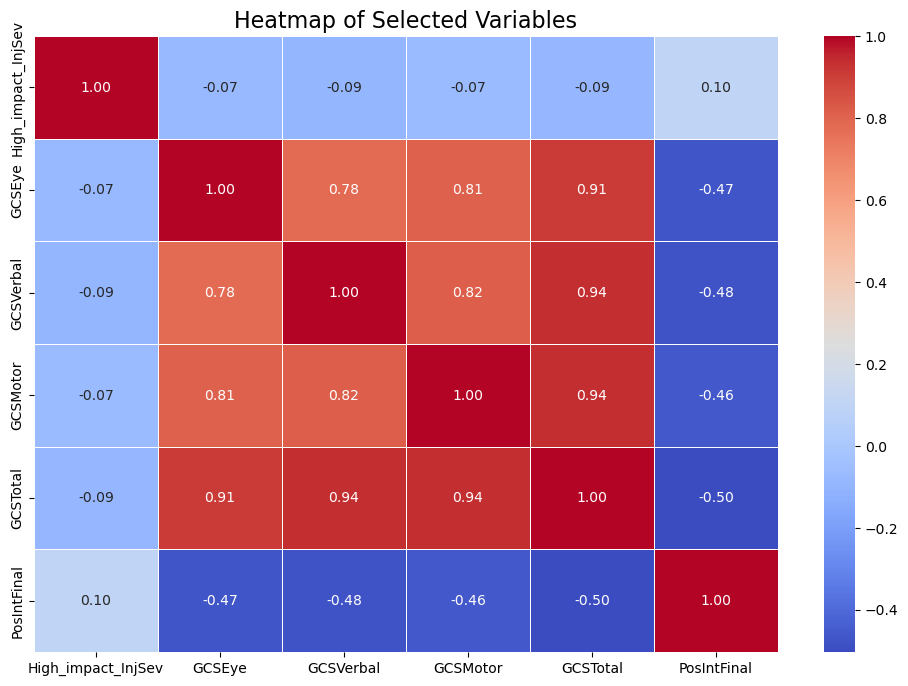

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of variables for the heatmap
heatmap_variables = [
    'High_impact_InjSev', 'GCSEye', 'GCSVerbal', 'GCSMotor', 
    'GCSTotal', 'PosIntFinal'
]

# Filter the relevant columns
data = df[heatmap_variables]

# Handle missing values (you can replace this with a more sophisticated method if needed)
data = data.dropna()

# Compute the correlation matrix
correlation_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Heatmap of Selected Variables', fontsize=16)
plt.show()